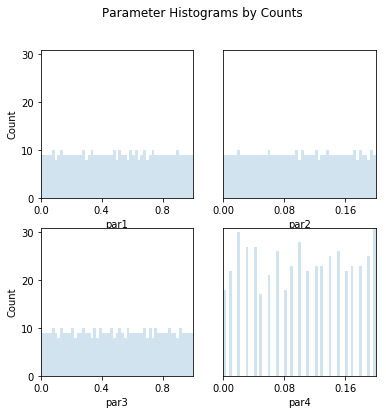



par1:
Count:            9        9        9        9       10        8        9       10        9        9        9        9        9        9        9       10        8        9       10        9        9        9        9        9        9        9       10        8       10        9        9        8       10        9       10        8        9       10        8        9       10        9        9        9        9        9        9        9        9       10        9        9        9        9        9 
 Bins:        0    0.018    0.036    0.055    0.073    0.091     0.11     0.13     0.15     0.16     0.18      0.2     0.22     0.24     0.25     0.27     0.29     0.31     0.33     0.35     0.36     0.38      0.4     0.42     0.44     0.45     0.47     0.49     0.51     0.53     0.55     0.56     0.58      0.6     0.62     0.64     0.65     0.67     0.69     0.71     0.73     0.75     0.76     0.78      0.8     0.82     0.84     0.85     0.87     0.89     0.91     0.93     0.95  

In [40]:
%matplotlib inline
import sys,os
try:
    import matk
except:
    try:
        sys.path.append(os.path.join('..','src'))
        import matk
    except ImportError as err:
        print 'Unable to load MATK module: '+str(err)
import numpy
from scipy import arange, randn, exp
from multiprocessing import freeze_support

# Model function
def dbexpl(p):
    t=arange(0,100,20.)
    y =  (p['par1']*exp(-p['par2']*t) + p['par3']*exp(-p['par4']*t))
    #nm =  ['o1','o2','o3','o4','o5']
    #return dict(zip(nm,y))
    return y

# Setup MATK model with parameters
p = matk.matk(model=dbexpl)
p.add_par('par1',min=0,max=1)
p.add_par('par2',min=0,max=0.2)
p.add_par('par3',min=0,max=1)
vals = numpy.linspace(0,0.2,21)
probs = [1./20.]*21

p.add_par('par4',discrete_vals = (vals,probs))

# Create LHS sample
s = p.lhs('lhs', siz=500, seed=1000)

# Look at sample parameter histograms, correlations, and panels
h = s.samples.hist(ncols=2, bins=55, title='Parameter Histograms by Counts')

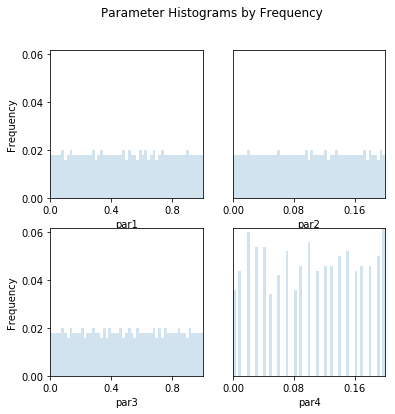



par1:
 Freq:         0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02     0.02 
 Bins:        0    0.018    0.036    0.055    0.073    0.091     0.11     0.13     0.15     0.16     0.18      0.2     0.22     0.24     0.25     0.27     0.29     0.31     0.33     0.35     0.36     0.38      0.4     0.42     0.44     0.45     0.47     0.49     0.51     0.53     0.55     0.56     0.58      0.6     0.62     0.64     0.65     0.67     0.69     0.71     0.73     0.75     0.76     0.78      0.8     0.82     0.84     0.85     0.87     0.89     0.91     0.93     0.95  

In [41]:
h = s.samples.hist(ncols=2,bins=55,title='Parameter Histograms by Frequency',frequency=True)

             par1     par2     par3     par4 
par1         1.00     0.00    -0.01     0.01 
par2         0.00     1.00    -0.00    -0.04 
par3        -0.01    -0.00     1.00     0.05 
par4         0.01    -0.04     0.05     1.00 


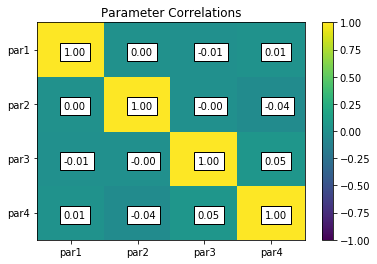

In [24]:
parcor = s.samples.corr(plot=True, title='Parameter Correlations')

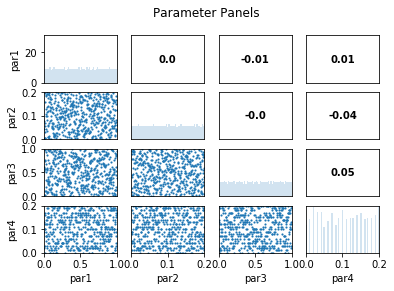

In [42]:
s.samples.panels(bins=55,title='Parameter Panels')

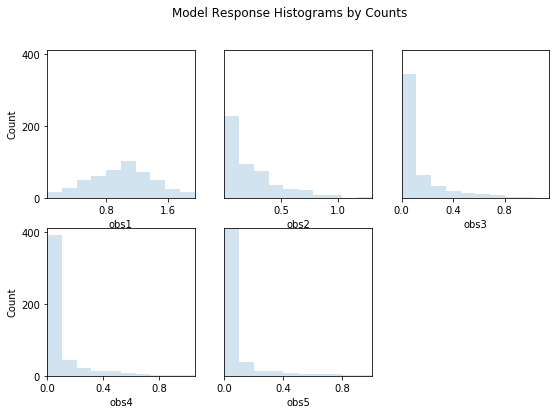



obs1:
Count:           16       28       51       62       77      103       72       49       25       17 
 Bins:    0.033     0.23     0.42     0.61      0.8     0.99      1.2      1.4      1.6      1.8        2 

obs2:
Count:          227       94       76       37       26       21        9        7        0        3 
 Bins:   0.0076     0.14     0.26     0.39     0.52     0.65     0.78     0.91        1      1.2      1.3 

obs3:
Count:          344       64       34       19       13       11        8        3        3        1 
 Bins:  0.00033     0.11     0.23     0.34     0.46     0.57     0.69      0.8     0.92        1      1.1 

obs4:
Count:          392       43       21       12       12        7        6        3        3        1 
 Bins:  7.7e-06     0.11     0.21     0.32     0.42     0.53     0.63     0.74     0.84     0.95      1.1 

obs5:
Count:          412       38       12       12        9        4        4        5        1        3 
 Bins:  1.7e-07      0.1  

In [32]:
# Run model with parameter samples
s.run( cpus=2, outfile='results.dat', logfile='log.dat',verbose=False)

# Look at response histograms, correlations, and panels
h = s.responses.hist(ncols=3,title='Model Response Histograms by Counts')

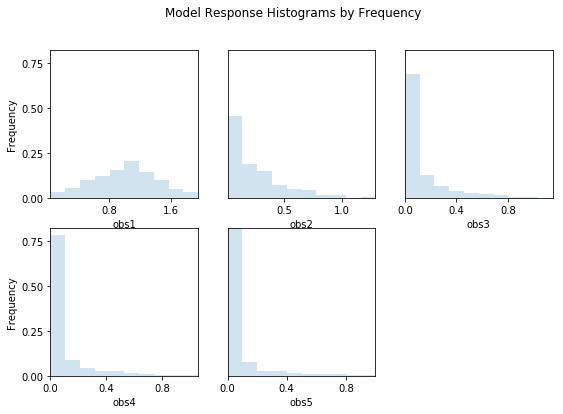



obs1:
 Freq:         0.03     0.06     0.10     0.12     0.15     0.21     0.14     0.10     0.05     0.03 
 Bins:    0.033     0.23     0.42     0.61      0.8     0.99      1.2      1.4      1.6      1.8        2 

obs2:
 Freq:         0.45     0.19     0.15     0.07     0.05     0.04     0.02     0.01     0.00     0.01 
 Bins:   0.0076     0.14     0.26     0.39     0.52     0.65     0.78     0.91        1      1.2      1.3 

obs3:
 Freq:         0.69     0.13     0.07     0.04     0.03     0.02     0.02     0.01     0.01     0.00 
 Bins:  0.00033     0.11     0.23     0.34     0.46     0.57     0.69      0.8     0.92        1      1.1 

obs4:
 Freq:         0.78     0.09     0.04     0.02     0.02     0.01     0.01     0.01     0.01     0.00 
 Bins:  7.7e-06     0.11     0.21     0.32     0.42     0.53     0.63     0.74     0.84     0.95      1.1 

obs5:
 Freq:         0.82     0.08     0.02     0.02     0.02     0.01     0.01     0.01     0.00     0.01 
 Bins:  1.7e-07      0.1  

In [33]:
h = s.responses.hist(ncols=3,title='Model Response Histograms by Frequency',frequency=True)

             obs1     obs2     obs3     obs4     obs5 
obs1         1.00     0.41     0.27     0.22     0.19 
obs2         0.41     1.00     0.95     0.87     0.80 
obs3         0.27     0.95     1.00     0.98     0.94 
obs4         0.22     0.87     0.98     1.00     0.99 
obs5         0.19     0.80     0.94     0.99     1.00 


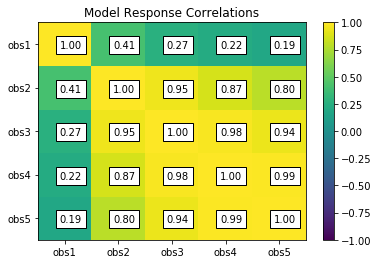

In [28]:
rescor = s.responses.corr(plot=True, title='Model Response Correlations')

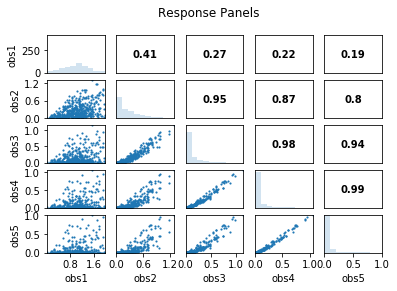

In [29]:
s.responses.panels(title='Response Panels')


Pearson Correlation Coefficients:
             obs1     obs2     obs3     obs4     obs5 
par1         0.70     0.29     0.17     0.13     0.10 
par2         0.00    -0.47    -0.40    -0.32    -0.27 
par3         0.70     0.29     0.21     0.19     0.17 
par4         0.04    -0.52    -0.48    -0.43    -0.39 


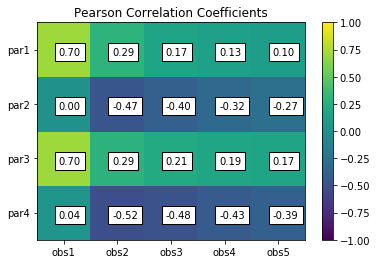


Spearman Correlation Coefficients:
             obs1     obs2     obs3     obs4     obs5 
par1         0.69     0.32     0.17     0.11     0.07 
par2        -0.01    -0.52    -0.55    -0.56    -0.56 
par3         0.70     0.28     0.14     0.09     0.06 
par4         0.05    -0.55    -0.60    -0.61    -0.62 


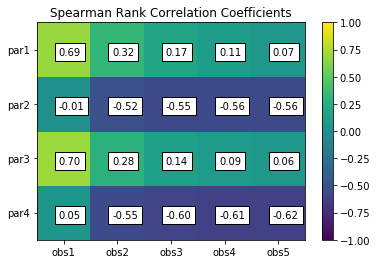

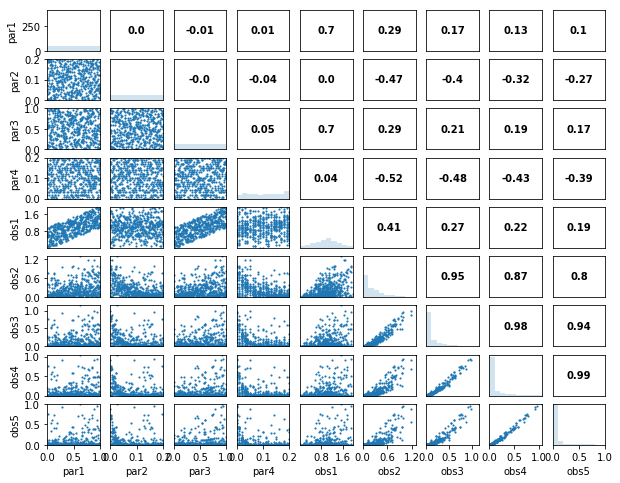

In [30]:
# Print and plot parameter/response correlations
print "\nPearson Correlation Coefficients:"
pcorr = s.corr(plot=True,title='Pearson Correlation Coefficients')
print "\nSpearman Correlation Coefficients:"
scorr = s.corr(plot=True,type='spearman',title='Spearman Rank Correlation Coefficients')
s.panels(figsize=(10,8))